In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# comprobamos que no hayan datos nulos
df = pd.read_excel("AnalisisDatos\\Reading Habits Based on Gender Undergraduate Students Dataset on Book Preferences and Engagement\\Reading Habits Among Undergraduate Students.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Gender                                                582 non-null    object
 1   Age                                                   582 non-null    int64 
 2   Department                                            582 non-null    object
 3   Amount of time spent reading books per day            582 non-null    int64 
 4   Reason for reading books                              582 non-null    object
 5   How to manage books for reading                       582 non-null    object
 6   Number of e-books you read last two years             493 non-null    object
 7   Number of printed books you read last two years       532 non-null    object
 8   Favorite books for reading to spend leisure time      582 non-null    

In [ ]:
# aqui solo cambiamos los datos con None por 0 para poder ocuparlos 
df['Number of e-books you read last two years'] = df['Number of e-books you read last two years'].fillna('0')
df['Number of printed books you read last two years'] = df['Number of printed books you read last two years'].fillna('0')

df['Number of e-books you read last two years'] = df['Number of e-books you read last two years'].astype(str)
df['Number of printed books you read last two years'] = df['Number of printed books you read last two years'].astype(str)


# solo pruebas para visivilizar datos en las filas y confirmar que hayan solo datos que nos interesan
print(df['Gender'].unique())
print(df['Which type of books do you read most of the time'].unique())
print(df['Which language books do you like to read'].unique())
print(df['The format that you used for reading books'].unique())
print(df['Number of printed books you read last two years'].unique())
print(df['Number of e-books you read last two years'].unique())
print(df['Age'].unique())







['Male' 'Female']
['Academic' 'Non-Academic']
['English' 'Bangla' 'Others']
['Both' 'E-books' 'Printed']
['11-15' '1-5' '6-10' 'More than 20' '16-20' '0']
['11-15' 'More than 20' '1-5' '6-10' '0' '16-20']
[22 23 21 20 19 18]


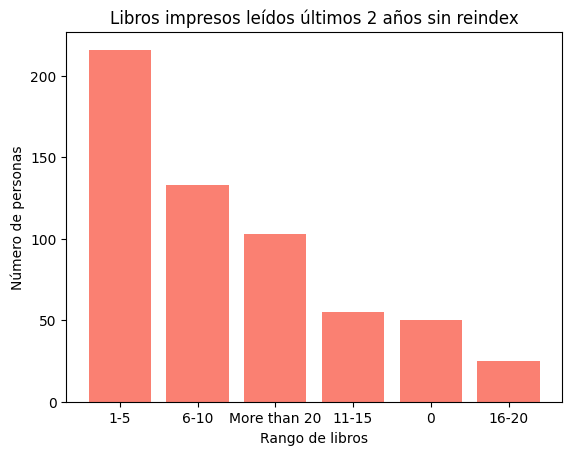

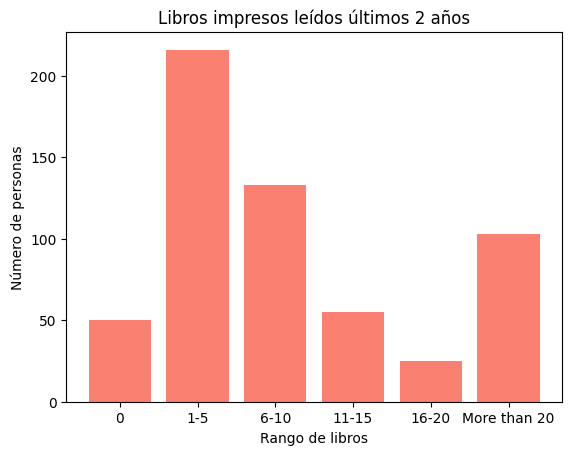

Number of printed books you read last two years
1-5             216
6-10            133
More than 20    103
11-15            55
0                50
16-20            25
Name: count, dtype: int64

In [83]:
orden_rangos = ['0','1-5', '6-10', '11-15', '16-20', 'More than 20']
printed_counts = df['Number of printed books you read last two years'].value_counts()
plt.bar(printed_counts.index, printed_counts.values, color='salmon')
plt.title('Libros impresos leídos últimos 2 años sin reindex')
plt.xlabel('Rango de libros')
plt.ylabel('Número de personas')
plt.show()
df['Number of printed books you read last two years'].value_counts()
# el reindex me lo dio la IA ya que el value_count me los tira en orden y asi hacemos que el grafico quede mas claro 

printed_counts = printed_counts.reindex(orden_rangos, fill_value=0) 

plt.bar(printed_counts.index, printed_counts.values, color='salmon')
plt.title('Libros impresos leídos últimos 2 años')
plt.xlabel('Rango de libros')
plt.ylabel('Número de personas')
plt.show()
df['Number of printed books you read last two years'].value_counts() 


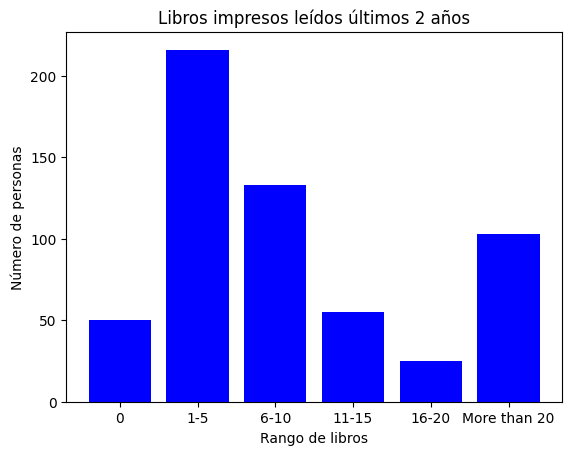

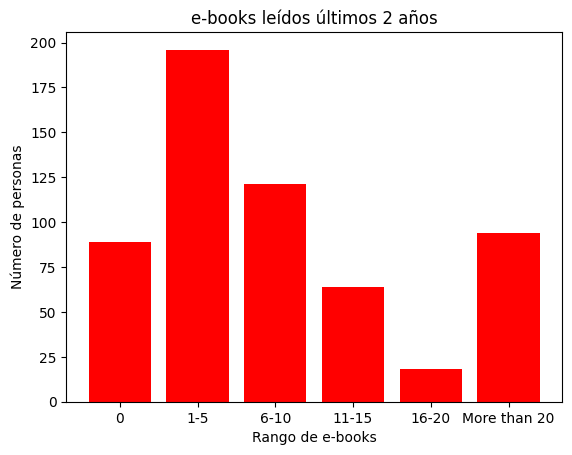

In [82]:
# entonces hacemos lo mismo para los e-books y copiare el grafico de arriba para hacer una comparativa
orden_rangos = ['0','1-5', '6-10', '11-15', '16-20', 'More than 20']
conteo_datos = df['Number of printed books you read last two years'].value_counts()
conteo_datos = conteo_datos.reindex(orden_rangos, fill_value=0) 

plt.bar(conteo_datos.index, conteo_datos.values, color='blue')
plt.title('Libros impresos leídos últimos 2 años')
plt.xlabel('Rango de libros')
plt.ylabel('Número de personas')
plt.show()


conteo_datos2 = df['Number of e-books you read last two years'].value_counts()
conteo_datos2 = conteo_datos2.reindex(orden_rangos, fill_value=0) 

plt.bar(conteo_datos2.index, conteo_datos2.values, color='red')
plt.title('e-books leídos últimos 2 años')
plt.xlabel('Rango de e-books')
plt.ylabel('Número de personas')
plt.show()





In [79]:
df['Number of e-books you read last two years'].value_counts() 


Number of e-books you read last two years
1-5             196
6-10            121
More than 20     94
0                89
11-15            64
16-20            18
Name: count, dtype: int64

In [80]:
df['Number of printed books you read last two years'].value_counts() 

Number of printed books you read last two years
1-5             216
6-10            133
More than 20    103
11-15            55
0                50
16-20            25
Name: count, dtype: int64

con esta comparativa nos damos cuenta que en una investigacion que recopilo datos de personas desde los 18 a los 23 años la cual de acuerdo al grfico vemos que en los rangos no hay mucha diferencia aunque donde mas se ve una diferencia es cuando se habla de que no leen ya que en e-books es mayor a libros impresos lo que quierre decir con la misma cantidad de datos que la gente si prefiere seguir leyendo en libros impresos

In [ ]:
#con esto cambiamos todo los elementos a string y revisamos cuantos leen con terminos academicos 
df['Which type of books do you read most of the time'].astype(str)
df['Which type of books do you read most of the time'].value_counts()


Which type of books do you read most of the time
Academic        359
Non-Academic    223
Name: count, dtype: int64

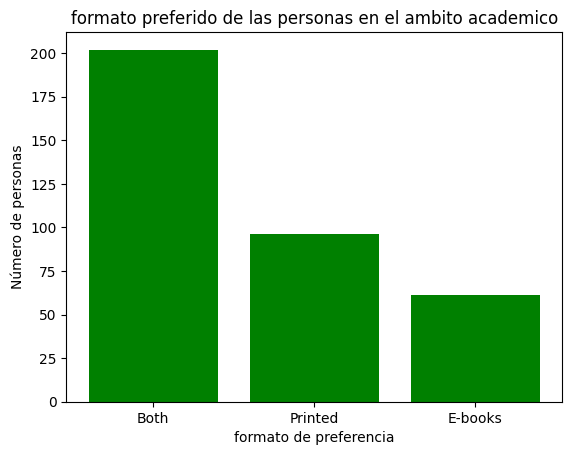

The format that you used for reading books
Both       202
Printed     96
E-books     61
Name: count, dtype: int64

In [102]:
#queremos saber lectura con sentido academico asi que creamos un nuevo df 
df_academico = df[df['Which type of books do you read most of the time'] == 'Academic']
orden_rangos1 = ['Both','Printed', 'E-books']
conteo_datos2 = df_academico['The format that you used for reading books'].value_counts()
conteo_datos2 = conteo_datos2.reindex(orden_rangos1, fill_value=0) 

plt.bar(conteo_datos2.index, conteo_datos2.values, color='green')
plt.title('formato preferido de las personas en el ambito academico')
plt.xlabel('formato de preferencia')
plt.ylabel('Número de personas')
plt.show()
df_academico['The format that you used for reading books'].value_counts()

con este grafico podemos ver que la gente prefiere en el ambito academico mayormente ambos formatos tanto e-books como impresos pero despues le sigue los impresos lo que quiere decir que esas personas jovenes siguen prefiriendo leer libros fisicos e informarse ocupando libros comun y corrientes